In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt


os.makedirs('img', exist_ok=True)

# Podešavanja izgleda grafikona (ako se izostavi dobićemo podrazumevani izgled)
plt.style.use('dark_background')
plt.rc('figure', facecolor = '#662d91')
plt.rc('savefig', facecolor = '#662d91')
plt.rc('axes', facecolor = '#00000000', edgecolor='#00ffff')
plt.rc('axes.spines', right = False, top = False)
plt.rc('grid', color = '#00ffff', linestyle = '--')
plt.rc('grid',linewidth = 0.5)
plt.rc('legend',facecolor='#662d91', edgecolor='#00ffff', framealpha=1)
plt.rc('font', size=14,family = 'sans-serif')
plt.rcParams['font.sans-serif'] = ['Tahoma','DejaVu Sans']

# Логистичка функција

Можемо сматрати да је логистичка функција настала модификовањем експоненцијалне за описивање раста који креће као експоненцијалан, али на крају има неко горње ограничење. Ако би експоненцијалну функциу записивали у облику:

$$g(t) = cr^t$$

онда одговарајућа 

$$g(t) = r^{t-t_p}{L\over r^{t-t_p} + 1}$$

Где $L$ горње ограничење, а $t_p$ превојна тачка када. Под претпоставком $r>1$, крива функције из фазе где постаје све стрмија прелази  у фазу да има све мањи нагиб и почиње да се приближава вредности $L$.

Погледајмо како то изгледа за конкретне вредности параметара.

In [2]:
L = 1000.0
r = 1.2
tp = 30.0

Нацртајмо граф функције на интервалу $[0,60]$

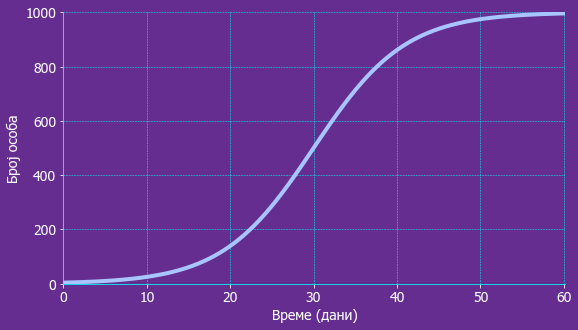

In [3]:
t = np.linspace(0, 60, 601) # размак између тачака је 1/10
g = r**(t - tp) * L / (r**(t - tp) + 1)

plt.figure(figsize=(9,5))
ax = plt.axes()
plt.plot(t,g, '#a8c5ff', linewidth=4)
plt.ylim(0,1001)
plt.xlim(0,60.2)
plt.grid(True)
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.savefig("img/logisticka1.png", bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.show()

На слици се јасно препознаје превојна тачка $t_p=30$ и горње ограничење $L=1000$. Видимо да крива има облик слова *S* и пресликава скуп свих реалних бројева на коначни интервал. Логистичка функција је најчешће коришћења таква функција.

У епидемиолошким моделима се функција користи за представљање укупног броја заражених особа. Зато смо је означили са $g$ како у овом курсу обично означавамо такву функцију.

Ако раставимо $r^{t-t_p}$ у количник добијамо

$$g(t) = r^{t-t_p}{L\over r^{t-t_p} + 1} = {L\over r^{t_p}}r^t{1\over r^{t-t_p} + 1}$$

За вредности $t$ које су много мање од $t_p$ израз $1\over r^{t-t_p} + 1$ је врло близу $1$, што значи да је на почетку функција лична експоненцијалној

$$ g_e(t) = {L\over r^{t_p}}r^t$$

Погледајмо то на графику.

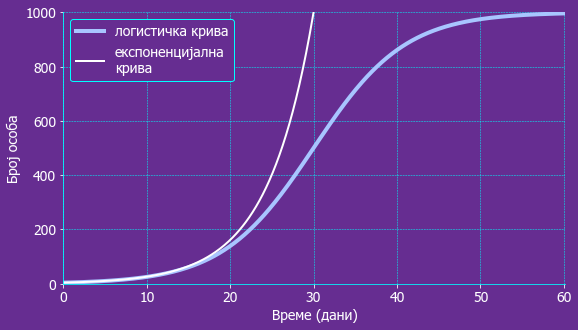

In [4]:
c = L/(r**tp)
ge = c*(r**t)
plt.figure(figsize=(9,5))
plt.plot(t,g, '#a8c5ff', linewidth=4, label = 'логистичка крива')
plt.plot(t,ge, 'white',linewidth=2, label= 'експоненцијална\nкрива')
plt.grid(True)
plt.xlim(0,60.2)
plt.ylim(0,1001)
plt.legend()
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.savefig("img/logisticka1a.png", bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.show()

Видимо да се на почетку експоненцијална и логистичка крива скоро не разликују.

Одговарајућа функција за број новозаражених математички може израчинати из $g(t)$ има следећу формулу

$$ f(t) = {r^{t+t_p}\over (r^t+r^{t_p})^2}L\ln r$$

In [5]:
f = r ** (t + tp) / (r**t + r**tp)**2  * L*np.log(r)

# исто смо могли израчунати нумеричким методом
# f = np.gradient(g,t[1]-t[0])

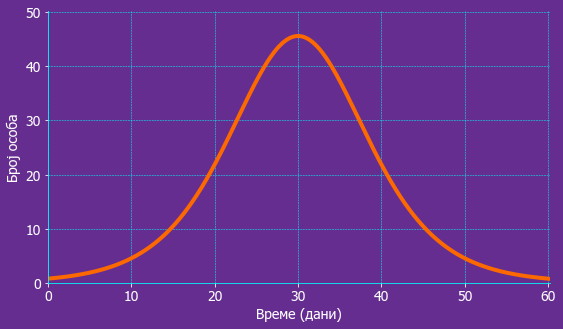

In [6]:
plt.figure(figsize=(9,5))
plt.plot(t,f, '#fc6900',linewidth=4)
plt.grid(True)
plt.ylim(0,50.2)
plt.xlim(0,60.2)
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.savefig("img/logisticka2.png", bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.show()

Додаћемо експоненцијалну криву.

У лекцији смо рекли да је код експоненцијалног раста и финкција за укупан број заражених и функција за број новозаражених експоненцијална. Конкретно, функцију за број новозаражених која одговара $g_e(t)$ је

$$f_e(t) = {L\log r\over r^{t_p}}r^t$$

In [7]:
fe = c*np.log(r)*(r**t)

# исто смо могли израчунати нумеричким методом
# fe = np.gradient(ge,t[1]-t[0])

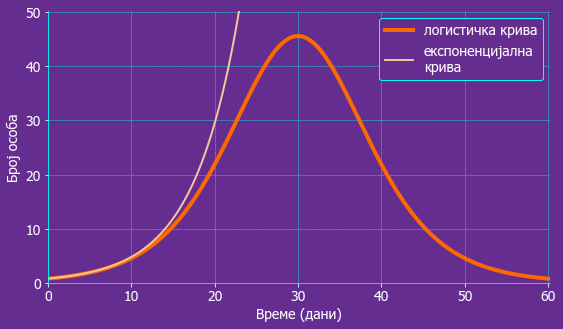

In [8]:
plt.figure(figsize=(9,5))
plt.plot(t,f, '#fc6900',linewidth=4, label = 'логистичка крива')
plt.plot(t,fe, '#f7c39d',linewidth=2, label= 'експоненцијална\nкрива')
plt.grid(True)
plt.ylim(0,50.2)
plt.xlim(0,60.2)
plt.xlabel('Време (дани)')
plt.ylabel('Број особа')
plt.legend()
plt.savefig("img/logisticka2a.png", bbox_inches='tight', pad_inches=0.5, dpi=150)
plt.show()